In [3]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [4]:
training_dir = "dataset/Training"
validation_dir = "dataset/Validation"
input_shape = (224,224,3)

### Veri artırma teknikleri

In [3]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(training_dir,
                                                       target_size=(224,224),
                                                       class_mode='categorical',
                                                       batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              batch_size= 16)


Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [4]:
import keras
from keras import layers
from tensorflow.keras.optimizers import Adam
#Adam dogrudan parametreli bir şekilde kullanabilmek için yukarıdakini çağırdım.
def fireNet(input_shape):
    #Conv2D ilk parametre tensor boyutu
    #Conv'da bu model için ilk tensor boyutunu küçük yaptım sonra artırdım,Dense'te tam tersi.
    #2 çıktım olacağı için en son Dense katmanını 2'ye düşürdüm.
    #Sequential liste biçiminde modele veriyorum.
    #layers.Dropout rastgele bağlantıları koparıp modeli iyileştirmeye çalışıyor.
    model = keras.models.Sequential([ layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape = input_shape),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                      
                                      layers.Conv2D(256, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                      
                                      layers.Conv2D(384, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                    
                                      layers.Flatten(),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(2048, activation="relu"),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(1024, activation="relu"),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(2, activation="softmax")
                                     ])
    
    model.compile(loss = "categorical_crossentropy",
                  optimizer = Adam(lr = 1e-4),
                  metrics = ["acc"])
    
    return model

In [5]:
model = fireNet(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

C:\Users\yusuf\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [6]:
history = model.fit( train_generator,
                     steps_per_epoch = 15,
                     epochs = 50,
                     validation_data = validation_generator,
                     validation_steps = 15 )

Epoch 1/50
15/15 [==============================] - 49s 3s/step - loss: 0.5443 - acc: 0.7096 - val_loss: 0.3861 - val_acc: 0.8745
Epoch 2/50
15/15 [==============================] - 41s 3s/step - loss: 0.3550 - acc: 0.8504 - val_loss: 0.3248 - val_acc: 0.8912
Epoch 3/50
15/15 [==============================] - 40s 3s/step - loss: 0.3329 - acc: 0.8679 - val_loss: 0.3054 - val_acc: 0.8745
Epoch 4/50
15/15 [==============================] - 40s 3s/step - loss: 0.2621 - acc: 0.9017 - val_loss: 0.2336 - val_acc: 0.9247
Epoch 5/50
15/15 [==============================] - 40s 3s/step - loss: 0.2208 - acc: 0.9225 - val_loss: 0.2159 - val_acc: 0.9331
Epoch 6/50
15/15 [==============================] - 41s 3s/step - loss: 0.2192 - acc: 0.9208 - val_loss: 0.2186 - val_acc: 0.9331
Epoch 7/50
15/15 [==============================] - 39s 3s/step - loss: 0.2127 - acc: 0.9258 - val_loss: 0.2263 - val_acc: 0.9289
Epoch 8/50
15/15 [==============================] - 40s 3s/step - loss: 0.2106 - acc: 0.92

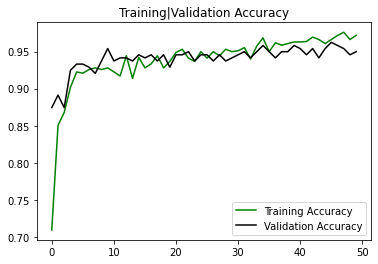

<Figure size 432x288 with 0 Axes>

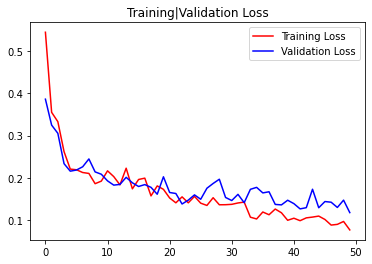

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(0,50)


plt.plot(epochs, acc, "g", label="Training Accuracy")
plt.plot(epochs, val_acc, "black", label="Validation Accuracy")
plt.title("Training|Validation Accuracy")

plt.legend(loc=0) #sag alt
plt.figure()
plt.show()


plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Training|Validation Loss")

plt.legend(loc=0)
plt.figure()
plt.show()



In [8]:
model.save("models/fire_model_yusuf.h5")

In [5]:
import cv2
import numpy as np
from keras.models import load_model

In [6]:
model = load_model("models/fire_model_yusuf.h5")
path = "test/test.jpg"
video_path = "test/test.mp4"

In [7]:
test_img = cv2.imread(path)

img = np.asarray(test_img)
img = cv2.resize(img, (224,224))

img = img/255
#print(img.shape)

img = img.reshape(1,224,224,3)
#print(img.shape)

predictions = model.predict(img)
pred = np.argmax(predictions[0])

probability = predictions[0][pred]
probability_ = "% {:.2f}".format(probability*100)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"
    
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,100), font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
cap = cv2.VideoCapture(video_path)

while True:
    ret,frame = cap.read()
    
    img = np.asarray(frame)
    img = cv2.resize(img, (224,224))

    img = img/255
    #print(img.shape)

    img = img.reshape(1,224,224,3)
    #print(img.shape)

    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = "% {:.2f}".format(probability*100)

    if pred == 1:
        label = "Fire"
    else:
        label = "Neutral"

    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0,255,0)

    cv2.putText(frame, label, (35,60), font, 1, color, 2)
    cv2.putText(frame, probability_, (35,100), font, 1, color, 2)

    cv2.imshow("Prediction", frame)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
    
    
cap.release()
cv2.destroyAllWindows()
    

